## Supervised Learning - Building a Student Performace Prediction System  

## Question 1 - Classification vs. Regression

*The aim of this project is to predict how likely a student is to pass. Which type of supervised learning problem is this, classification or regression? Why?*

#### Answer:
This project is a classification supervised learning problem because the variable to predict, i.e. if a student graduates or fails to graduate, is categorical. On this case this a dichotomous categorical variable where the only two possible values are "pass" or "fail".

### Overview:

1.Read the problem statement.

2.Get the dataset.

3.Explore the dataset.

4.Pre-processing of dataset.

5.Transform the dataset for building machine learning model.

6.Split data into train, test set.

7.Build Model.

8.Apply the model.

9.Evaluate the model.

10.Provide insights.

## Problem Statement 

Using Logistic Regression **predict the performance of student**. The classification goal is to predict whether the student will pass or fail.

## Dataset 

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in Mathematics.

**Source:** https://archive.ics.uci.edu/ml/datasets/Student+Performance


## Question 2
## Exploring the Data
*Read the dataset file using pandas. Take care about the delimiter.*

#### Answer:

In [1]:
#importing all the necessary modules

%matplotlib inline 

#importing pandas so that data transformation can be done in a grid format.
import pandas as pd

#importing libraries in order to use the mathematical operators.
import math as m
import numpy as np 

#In order to have good visualization 
import seaborn as sns 
import matplotlib.pyplot as plt

#For splitting the data into training and testing.
from sklearn.model_selection import train_test_split 
from sklearn import metrics 

In [2]:
#Reading the data into the dataframe.
#The datafile has a delimiter in the form of a semi colon that seperates the data. The data is represented in a bunch wherein the observations becomes quite complex. Therefore, the use of delimiter function is a must in order to read the data easily.
DF= pd.read_csv("students-data1.csv", delimiter= ';')
DF.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,5,4,2,1,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,4,4,4,1,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,4,2,2,1,1,1,0,16,18,19
9,GP,M,15,U,GT3,T,3,4,other,other,...,5,5,1,1,1,5,0,14,15,15


In [3]:
#Always a good practice to understand the depth vs breadth analysis.
#From the given dataset we can infer that, the number of records are not enough to capture the  number of attributes.
#This may lead to the "Curse of dimentionality".
#We will still go forward with the given dataset. 


DF.shape

(395, 33)

## Question 3
## Drop missing values
*Set the index name of the dataframe to **"number"**. Check sample of data to drop if any missing values are there.*

#### Answer:

In [4]:
#Setting the index name of the data frame to number using ".rename_axis" function. 
DF= DF.rename_axis('number')

#Verifying if the change has been implemented.
DF.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [5]:
#To check if there are any null values in the data frame. 
#There seems to be no null values, rightly mentioned as per the UCI page.
DF.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [6]:
#To check if there are any NaN values in the data frame.
DF.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

## Transform Data

*Print all the attribute names which are not numerical.*

**Hint:** check **select_dtypes()** and its **include** and **exclude** parameters.**

#### Answer:

In [7]:
#Storing DF in a new dataframe DF1, as it is a good practice to keep the original dataframe unchanged.
#Checking the data type of the newly created dataframe.

DF1=DF
DF1.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [8]:
#Selecting all the non-numerical attributes. 
DF1.select_dtypes(exclude=['int64'])

,school,sex,address,famsize,Pstatus,Mjob,Fjob,reason,guardian,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic
number,,,,,,,,,,,,,,,,,
0,GP,F,U,GT3,A,at_home,teacher,course,mother,yes,no,no,no,yes,yes,no,no
1,GP,F,U,GT3,T,at_home,other,course,father,no,yes,no,no,no,yes,yes,no
2,GP,F,U,LE3,T,at_home,other,other,mother,yes,no,yes,no,yes,yes,yes,no
3,GP,F,U,GT3,T,health,services,home,mother,no,yes,yes,yes,yes,yes,yes,yes
4,GP,F,U,GT3,T,other,other,home,father,no,yes,yes,no,yes,yes,no,no
5,GP,M,U,LE3,T,services,other,reputation,mother,no,yes,yes,yes,yes,yes,yes,no
6,GP,M,U,LE3,T,other,other,home,mother,no,no,no,no,yes,yes,yes,no
7,GP,F,U,GT3,A,other,teacher,home,mother,yes,yes,no,no,yes,yes,no,no
8,GP,M,U,LE3,A,services,other,home,mother,no,yes,yes,no,yes,yes,yes,no


## Drop variables with less variance

*Find the variance of each numerical independent variable and drop whose variance is less than 1.*

In [9]:
#Checking the variance for all the attributes in the dataframe DF1. 

DF1.var()

age            1.628285
Medu           1.198445
Fedu           1.184180
traveltime     0.486513
studytime      0.704324
failures       0.553017
famrel         0.803997
freetime       0.997725
goout          1.239388
Dalc           0.793420
Walc           1.658678
health         1.932944
absences      64.049541
G1            11.017053
G2            14.148917
G3            20.989616
dtype: float64

In [10]:
#Dropping all the attributes having their respective variance less than 1.  
DF1.drop(columns=['traveltime','studytime','failures','famrel','freetime','Dalc'],inplace=True)

In [11]:
#Checking if the columns have been dropped. With the reshapw function we can determine if they have been dropped.
#After dropping 6 columns with their variance less than 1, there will be a total of 27 columns present.
DF1.shape

(395, 27)

In [12]:
#Verifying if the change has been implemented.
DF1.head(10)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,yes,no,no,4,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,yes,no,3,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,yes,no,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,yes,2,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,yes,no,no,2,2,5,4,6,10,10
5,GP,M,16,U,LE3,T,4,3,services,other,...,yes,yes,no,2,2,5,10,15,15,15
6,GP,M,16,U,LE3,T,2,2,other,other,...,yes,yes,no,4,1,3,0,12,12,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,yes,no,no,4,1,1,6,6,5,6
8,GP,M,15,U,LE3,A,3,2,services,other,...,yes,yes,no,2,1,1,0,16,18,19


## Question 4 - Encode all categorical variables to numerical

Take the list of categorical attributes(from the above result) and convert them into neumerical variables. After that, print the head of dataframe and check the values.

**Hint:** check **sklearn LabelEncoder()**

#### Answer:

In [13]:
#Importing the necessary module for Encoding.

from sklearn.preprocessing import LabelEncoder


In [14]:
#Encoding by selecting all the attributes having an object datatype from the dataframe. 
#Specifying column.
#Running a loop for all such attributes in the dataframe and encoding them respectively. 

inc= DF1.select_dtypes(include = object).columns
print(inc)
LE= LabelEncoder()

for i in inc:
    DF1[i]= LE.fit_transform(DF1[i])
    print(i,DF1[i].unique())
    
DF1.info()
DF1.head()


Index(['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob',
       'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
       'nursery', 'higher', 'internet', 'romantic'],
      dtype='object')
school [0 1]
sex [0 1]
address [1 0]
famsize [0 1]
Pstatus [0 1]
Mjob [0 1 2 3 4]
Fjob [4 2 3 1 0]
reason [0 2 1 3]
guardian [1 0 2]
schoolsup [1 0]
famsup [0 1]
paid [0 1]
activities [0 1]
nursery [1 0]
higher [1 0]
internet [0 1]
romantic [0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 27 columns):
school        395 non-null int32
sex           395 non-null int32
age           395 non-null int64
address       395 non-null int32
famsize       395 non-null int32
Pstatus       395 non-null int32
Medu          395 non-null int64
Fedu          395 non-null int64
Mjob          395 non-null int32
Fjob          395 non-null int32
reason        395 non-null int32
guardian      395 non-null int32
schoolsup     395 non-null int

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,higher,internet,romantic,goout,Walc,health,absences,G1,G2,G3
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,0,0,4,1,3,6,5,6,6
1,0,0,17,1,0,1,1,1,0,2,...,1,1,0,3,1,3,4,5,5,6
2,0,0,15,1,1,1,1,1,0,2,...,1,1,0,2,3,3,10,7,8,10
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,2,1,5,2,15,14,15
4,0,0,16,1,0,1,3,3,2,2,...,1,0,0,2,2,5,4,6,10,10


## Question 5 - Convert the continuous values of grades into classes

*Consider the values in G1, G2 and G3 with >= 10 as pass(1) and < 10 as fail(0) and encode them into binary values. Print head of dataframe to check the values.*

#### Answer:

In [15]:
#Converting all the values less than 10 as fail and encoding them as '0'
DF1[DF1.iloc[:,24:27]<10] = 0

In [16]:
#Converting all the values more than 10 as pass and encoding them as '1'
DF1[DF1.iloc[:,24:27]>=10] = 1

In [17]:
#Verifying if the change has been implemented.
DF1.iloc[:,24:27]

,G1,G2,G3
number,,,
0,0,0,0
1,0,0,0
2,0,0,1
3,1,1,1
4,0,1,1
5,1,1,1
6,1,1,1
7,0,0,0
8,1,1,1


## Question 6 
*Consider G3 is the target attribute and remaining all attributes as features to predict G3. Now, separate features and target into separate dataframes and name them X and y respectively.*

In [18]:
#Since all the other features are used to predict G3 , we store it in X.

X= DF1.iloc[:,0:-1]
X.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,nursery,higher,internet,romantic,goout,Walc,health,absences,G1,G2
number,,,,,,,,,,,,,,,,,,,,,
0,0,0,18,1,0,0,4,4,0,4,...,1,1,0,0,4,1,3,6,0,0
1,0,0,17,1,0,1,1,1,0,2,...,0,1,1,0,3,1,3,4,0,0
2,0,0,15,1,1,1,1,1,0,2,...,1,1,1,0,2,3,3,10,0,0
3,0,0,15,1,0,1,4,2,1,3,...,1,1,1,1,2,1,5,2,1,1
4,0,0,16,1,0,1,3,3,2,2,...,1,1,0,0,2,2,5,4,0,1


In [19]:
#Since G3 is the target variable, we store it in y.

y= DF1.iloc[:, 26:27]
y.head(5)

,G3
number,
0,0
1,0
2,1
3,1
4,1


In [20]:
#Verifying the changes for X.
X.shape

(395, 26)

In [21]:
#Verifying the changes for y.
y.shape

(395, 1)

## Visualization

## Question 7

*Plot G2 and G3 and give your understanding on relation between both variables.*

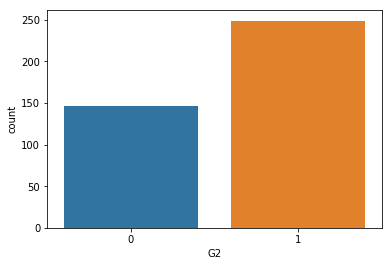

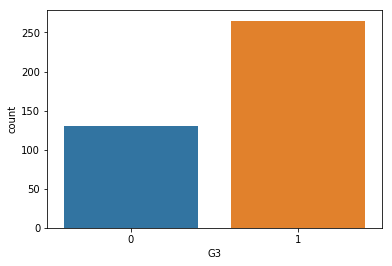

1.0985791994647682e-59
G2 and G3 are corelated


G3,0,1
G2,,
0,122,24
1,8,241


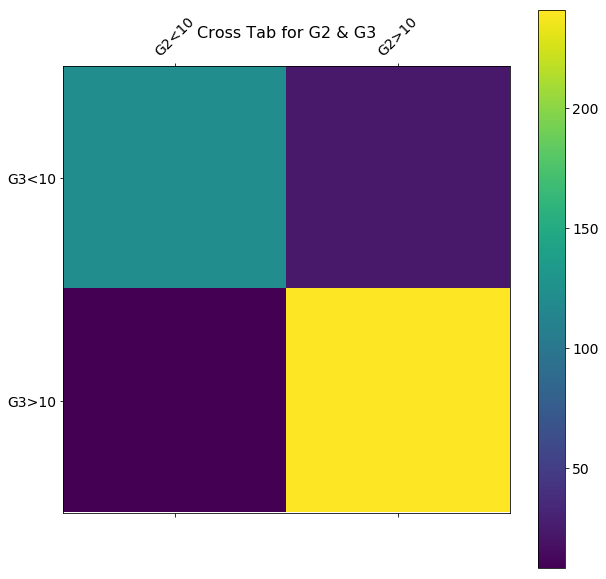

In [22]:
#Plotting 'G2'- frequency plot.
sns.countplot(x= 'G2', data=DF1)
plt.show()

#Plotting 'G3'- frequency plot.
sns.countplot(x= 'G3', data=DF1)
plt.show()

#Making a crosstab between two variables to understand the similarity.
cross= pd.crosstab(DF1['G2'], DF1['G3'])

#Making a heatmap of the crosstab for easy visualization.
df = cross

f = plt.figure(figsize=(10, 10))
plt.matshow(df, fignum=f.number)
plt.xticks(DF1["G2"].unique(),labels=["G2<10","G2>10"], fontsize=14, rotation=45)
plt.yticks(DF1["G3"].unique(),labels=["G3<10","G3>10"], fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Cross Tab for G2 & G3', fontsize=16);

# Performing a Chi2 test on the two variables to statistically infer on the dependency  
import scipy

chi2, p, ddof, expected = scipy.stats.chi2_contingency(cross)
print(p)
if p <= 0.005:
    print("G2","and","G3","are corelated")

cross


The G3 depends a great deal on the G2. Thus, the G2 can be a good predictor of the outcome variable.


## Question 8

*Plot the number of students in each school and number of students with different ages in separate plots.*

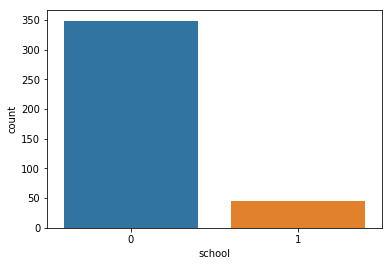

In [23]:
# Ploting "school" variable - frequency plot


sns.countplot(x= 'school', data= DF1)
plt.show()

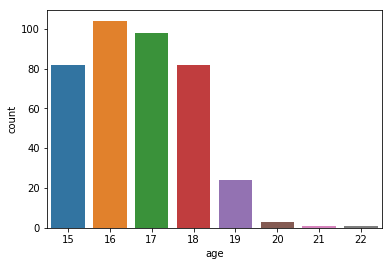

In [24]:
# Ploting "age" variable - frequency plot
# We see that students mostly fall in an age bracket between [15,19] with few outliers

sns.countplot(x = "age", data = DF1)
plt.show()

## Question 9 - Training and testing data split

*So far, you have converted all categorical features into numeric values. Now, split the data into training and test sets with training size of 300 records. Print the number of train and test records.*

**Hint:** check **train_test_split()** from **sklearn**

#### Answer:

In [25]:
# Splitting the dataset into 300 for training and the rest for testing.

obs = 395;
train = 300;

test_size = (obs - train)/(obs);
seed = 1;

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(300, 26)
(95, 26)
(300, 1)
(95, 1)


## Question 10 - Model Implementation and Testing the Accuracy

*Build a **LogisticRegression** classifier using **fit()** and **predict()** functions in sklearn. Print Accuracy and F1 score of Training and Test sets.*

#### Answer:

In [26]:
#Importing necessary modules.
from sklearn.linear_model import LogisticRegression

#Calling Logistic Regression object and storing it into model.
model= LogisticRegression()

#Fitting the dataset into the model.
model.fit(X_train ,y_train)

#Predicting 'y' by using model.predict and 'X_test'
y_predict= model.predict(X_test)

#Measuring the model score and accuracy.
model_score= model.score(X_test, y_test)
print(model_score)

#Printing the confusion matrix, f1-score, precision and recall.
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

#End result: 91% accuracy in the test dataset
#Recall= 91% i.e we predicted students with 'G3>10' by 91% 

0.9052631578947369
[[25  3]
 [ 6 61]]
              precision    recall  f1-score   support

           0       0.81      0.89      0.85        28
           1       0.95      0.91      0.93        67

   micro avg       0.91      0.91      0.91        95
   macro avg       0.88      0.90      0.89        95
weighted avg       0.91      0.91      0.91        95



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [28]:
#A score of the model using stats model 

import statsmodels.api as sm
log_mod = sm.MNLogit(y_train, X_train).fit()

print(log_mod.summary())

Optimization terminated successfully.
         Current function value: 0.185962
         Iterations 9
                          MNLogit Regression Results                          
Dep. Variable:                     G3   No. Observations:                  300
Model:                        MNLogit   Df Residuals:                      274
Method:                           MLE   Df Model:                           25
Date:                Sun, 06 Oct 2019   Pseudo R-squ.:                  0.7099
Time:                        17:40:56   Log-Likelihood:                -55.789
converged:                       True   LL-Null:                       -192.31
                                        LLR p-value:                 1.465e-43
      G3=1       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
school         0.3350      0.955      0.351      0.726      -1.537       2.207
sex           -0.3578      0.

# Naive bayes with Iris data

### Import Iris.csv

In [31]:
#Storing the iris dataset in Iris dataframe.

Iris= pd.read_csv('iris.csv')
Iris.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
#Its always a good practice to do a depth vs breadth analysis.

Iris.shape

(152, 6)

In [37]:
#Storing the contents of the original dataframe 'Iris' into 'Iris1'
#It is always a good practice the keep the original dataframe untouched. 

Iris1= Iris
Iris1.head(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [40]:
#Checking the entire description of the dataset.
#To find statistical relations.

Iris1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,151.0,5.843709,0.825314,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,151.0,1.202649,0.762185,0.1,0.30,1.30,1.80,2.5


In [38]:
#Checking if there are any Nan values. 
#Observation: SepalLength, SepalWidth, PetalLength, PetalWidth have Nan values
#These values need to be treated

Iris1.isna().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

In [41]:
#Replacing all the Nan values.

Iris1.fillna(Iris1.median(),inplace=True)

In [42]:
#Verifying the presence of Nan values after they are replaced.
#Observation: Replaced.

Iris1.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### Slice data set for Independent variables and dependent variables
#### Please note 'Species' is my dependent variables, name it y and independent set data as X

In [46]:
#Slicing the dataset into dependent and independent variables. 
#Storing all independent variables in X 
X= Iris1.iloc[:, 1:-1]
y= Iris.iloc[:,-1]

In [48]:
X.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
y.head(10)

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
5    Iris-setosa
6    Iris-setosa
7    Iris-setosa
8    Iris-setosa
9    Iris-setosa
Name: Species, dtype: object

### Find the distribution of target variable (Class)

In [50]:
#Describing the information in the target class.
y.describe()


count                152
unique                 3
top       Iris-virginica
freq                  52
Name: Species, dtype: object

In [51]:
#Distribution of Species(target variable) across its unique values.
y.value_counts()

Iris-virginica     52
Iris-versicolor    50
Iris-setosa        50
Name: Species, dtype: int64

### Plot the distribution of target variable using histogram

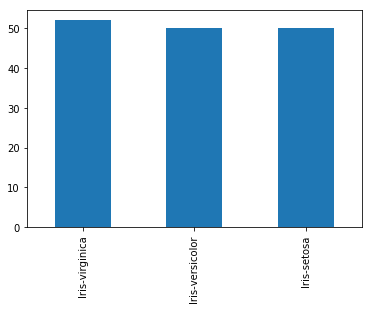

In [52]:
#Visual representation of the above distribution.

pd.value_counts(Iris1["Species"]).plot(kind="bar")

### Plot Scatter Matrix to understand the distribution of variables and give insights from it( 1 Marks)

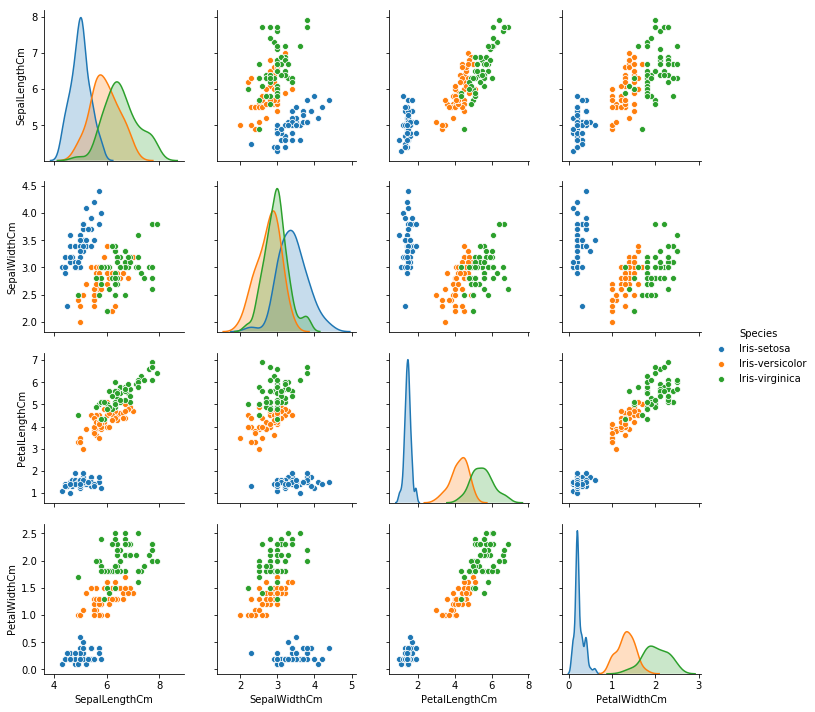

In [55]:
#Doing a bi-variate analysis on the independent variables 
#For different classes

sns.pairplot(Iris1.iloc[:, 1:6], hue = "Species")

# Observations:
#Sepal_Length, Petal_Length and Petal_Width is fairly distributed amongst 3 classes.
 
#Sepal_Width overlaps in all the 3 classes so it won't act as a good classifying variable.

### Summary Statistics and explain insights for at least 2 variables

In [59]:
#Checking the entire description of the dataset.
#To find statistical relations.


Iris1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,152.0,76.500000,44.022721,1.0,38.75,76.50,114.25,152.0
SepalLengthCm,152.0,5.843421,0.822584,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,152.0,3.053289,0.430757,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,152.0,3.766447,1.754000,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,152.0,1.203289,0.759698,0.1,0.30,1.30,1.80,2.5


In [60]:
#Observations: 
#Mean and median for Sepal_Length and Petal_Width do not vary much.
#There is a huge standard deviation in Petal_Length.
#Petal_Length might have a a left tail as 'Q3-Q2' is less than 'Q2-Q1'.

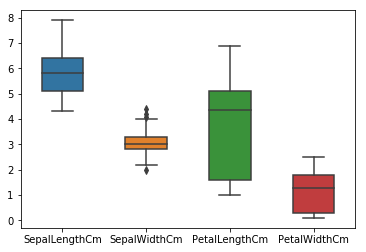

In [61]:
#Visualizing the dataset

sns.boxplot(data=X, width=0.5)

### Correlation among all variables and give your insights

In [68]:
#Correlation of independent variables.

Iris1.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.702734,-0.392693,0.872346,0.890676
SepalLengthCm,0.702734,1.000000,-0.109369,0.871120,0.815986
SepalWidthCm,-0.392693,-0.109369,1.000000,-0.420713,-0.356510
PetalLengthCm,0.872346,0.871120,-0.420713,1.000000,0.962043
PetalWidthCm,0.890676,0.815986,-0.356510,0.962043,1.000000


In [70]:
#Correlation with respect to unique classes in dependent variable.

Iris1.groupby('Species').corr()

Id  SepalLengthCm  SepalWidthCm  \
Species                                                                
Iris-setosa     Id             1.000000      -0.033561     -0.066688   
                SepalLengthCm -0.033561       1.000000      0.746780   
                SepalWidthCm  -0.066688       0.746780      1.000000   
                PetalLengthCm  0.053253       0.263874      0.176695   
                PetalWidthCm   0.087492       0.279092      0.279973   
Iris-versicolor Id             1.000000      -0.269056     -0.081867   
                SepalLengthCm -0.269056       1.000000      0.525911   
                SepalWidthCm  -0.081867       0.525911      1.000000   
                PetalLengthCm -0.189481       0.754049      0.560522   
                PetalWidthCm  -0.168846       0.546461      0.663999   
Iris-virginica  Id             1.000000      -0.086273      0.128709   
                SepalLengthCm -0.086273       1.000000      0.441913   
                SepalWidthCm   0.128709       0.441913      1.000000   
                PetalLengthCm -0.308762       0.862003      0.361857   
                PetalWidthCm  -0.073445       0.324277      0.495890   

                               PetalLengthCm  PetalWidthCm  
Species                                                     
Iris-setosa     Id                  0.053253      0.087492  
                SepalLengthCm       0.263874      0.279092  
                SepalWidthCm        0.176695      0.279973  
                PetalLengthCm       1.000000      0.306308  
                PetalWidthCm        0.306308      1.000000  
Iris-versicolor Id                 -0.189481     -0.168846  
                SepalLengthCm       0.754049      0.546461  
                SepalWidthCm        0.560522      0.663999  
                PetalLengthCm       1.000000      0.786668  
                PetalWidthCm        0.786668      1.000000  
Iris-virginica  Id                 -0.308762     -0.073445  
                SepalLengthCm       0.862003      0.324277  
                SepalWidthCm        0.361857      0.495890  
                PetalLengthCm       1.000000      0.402333  
                PetalWidthCm        0.402333      1.000000

In [ ]:
#Observation:
#All values less than '0' have negative correlation.
#All values greater than '0' have positive correlation.
#All values closer to '0' indicate two values are least correlated.
#All values closer to '1', '-1'indicate two values are highly correlated.
#Sepal_Length and Sepal_Width are negatively correlated.
#Sepal_Length and Petal_Width are positively correlated and have a high correlation.
#Sepal_Length and Petal_Length are positively correlated and have high correlation.
#Petal_Length and Petal_Width have the highest correlation.

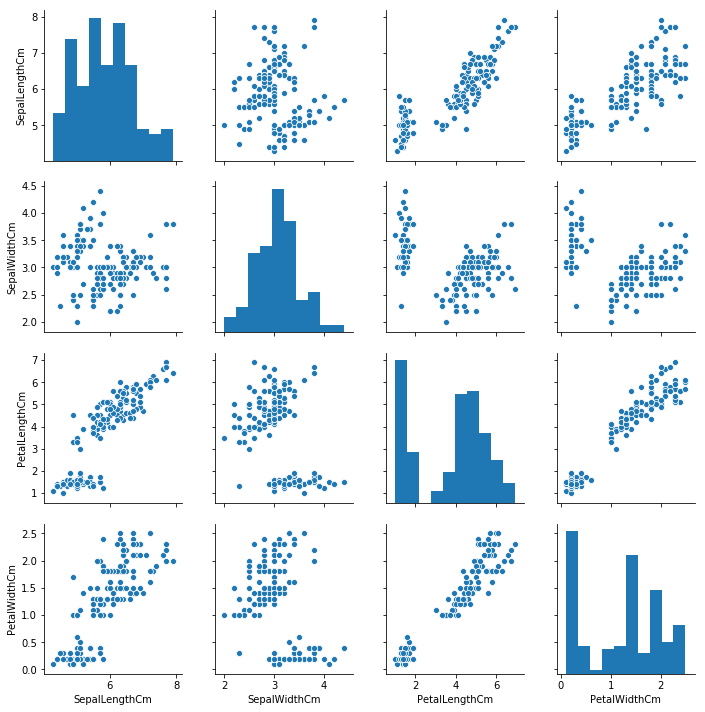

In [71]:
#Visualization of correlation between independent variables.
sns.pairplot(X)

### Split data in Training and Validation in 80:20

In [73]:
#Splitting the data into training set & test set.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=1)

### Do Feature Scaling

In [74]:
# Normalizing the feature space using the z-score

from scipy.stats import zscore
X_z = X.apply(zscore)

### Train and Fit NaiveBayes Model

In [75]:
#Importing Naive Bayes.

from sklearn.naive_bayes import GaussianNB

In [76]:
#Calling GaussianNB and storing it into model.
#Fitting the model into training data.

model= GaussianNB()
model.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
#Predicting 'y' by using model.predict and 'X_test'

y_predict= model.predict(X_test)

In [80]:
# Scoring the model on the training dataset.
model.score(X_train, y_train)

0.9338842975206612

### Print Accuracy and Confusion Matrix and Conclude your findings

In [79]:
#Measuring the model score and accuracy.
model_score= model.score(X_test, y_test)
print(model_score)

#Printing the confusion matrix, f1-score, precision and recall.
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

1.0
[[10  0  0]
 [ 0 13  0]
 [ 0  0  8]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00        13
 Iris-virginica       1.00      1.00      1.00         8

      micro avg       1.00      1.00      1.00        31
      macro avg       1.00      1.00      1.00        31
   weighted avg       1.00      1.00      1.00        31



In [ ]:
#Observation: The model has predicted the Classes with 100% accuracy with 100% recall and F1-score.

In [81]:
#Performing K-fold validation on the model built. 

from sklearn.model_selection import cross_val_score, cross_val_predict

scores = cross_val_score(model, X_train, y_train, cv=10)
print("Cross-validated scores:", scores , scores)
print("Average score:" , np.average(scores))

#Here the model prediction accuracy cons to be 91%

Cross-validated scores: [0.84615385 0.84615385 1.         0.92307692 0.91666667 0.83333333
 1.         0.90909091 0.90909091 0.90909091] [0.84615385 0.84615385 1.         0.92307692 0.91666667 0.83333333
 1.         0.90909091 0.90909091 0.90909091]
Average score: 0.9092657342657342
